In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("email.csv")

In [3]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
data.tail(10)

,Category,Message
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name
5572,"{""mode"":""full""",isActive:false}


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
print("Unique categories after cleaning:", data["Category"].unique())
print("Original categories:", data["Category"].unique())
data["Category"] = data["Category"].apply(lambda x: str(x).strip().lower())
print("Cleaned categories:", data["Category"].unique())
print(data["Category"].isna().sum())

Unique categories after cleaning: ['ham' 'spam' '{"mode":"full"']
Original categories: ['ham' 'spam' '{"mode":"full"']
Cleaned categories: ['ham' 'spam' '{"mode":"full"']
0


In [8]:
data.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
data.duplicated().sum()

np.int64(415)

In [10]:
data=data.drop_duplicates()

In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5158 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5158 non-null   object
 1   Message   5158 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Category', ylabel='count'>

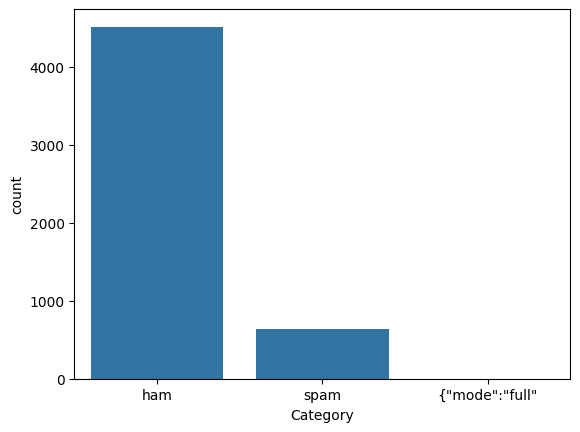

In [14]:
sns.countplot(data, x="Category")

In [15]:
pip install seaborn wordcloud matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


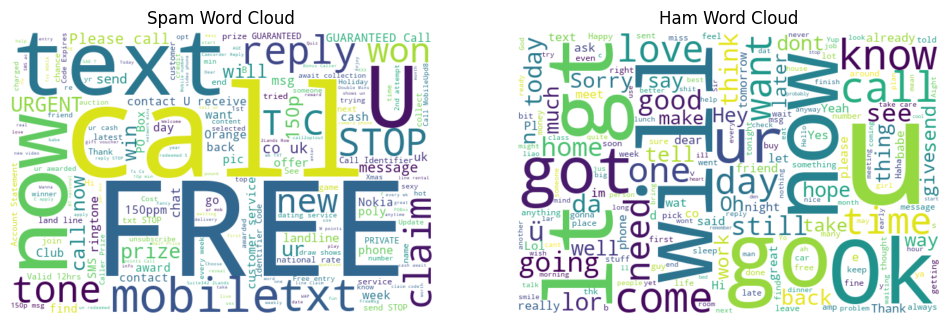

In [16]:
from wordcloud import WordCloud

# Separate spam and ham texts
spam_words = ' '.join(data[data['Category']=='spam']['Message'])
ham_words = ' '.join(data[data['Category']=='ham']['Message'])

# Generate word clouds
spam_cloud = WordCloud(width=600, height=400, background_color='white').generate(spam_words)
ham_cloud = WordCloud(width=600, height=400, background_color='white').generate(ham_words)

# Show both
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(spam_cloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_cloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()


In [17]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
data.shape

(5158, 2)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5158 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5158 non-null   object
 1   Message   5158 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [20]:
data.isnull()

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5568,False,False
5569,False,False
5570,False,False
5571,False,False


In [21]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [22]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [23]:
data["Category"].unique()

array(['ham', 'spam', '{"mode":"full"'], dtype=object)

In [24]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [25]:
import pandas as pd

# Standardize column names
data.columns = data.columns.str.strip()

# Lowercase and clean category values
data["Category"] = data["Category"].astype(str).str.lower().str.strip()

# Check unique values now
print(data["Category"].unique())


['ham' 'spam' '{"mode":"full"']


In [26]:
data = data.dropna(subset=["Category"])


In [27]:
#data["Category"]=data["Category"].astype(str).str.lower()
#data["Category"]=data["Category"].map({"ham":0,"spam":1})

In [27]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [28]:
data["Category"].isna().sum()

np.int64(0)

In [29]:
data = data.dropna(subset=["Category"]) 

In [30]:
print(data["Category"].isna().sum())

0


In [31]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [32]:
# 📌 Step 3: Explore and Clean Data
print("Before cleaning:", data["Category"].unique())

# Clean and normalize the label
data["Category"] = data["Category"].apply(lambda x: str(x).strip().lower())
data = data[data["Category"].isin(["ham", "spam"])]
#data["Category"] = data["Category"].map({"ham": 0, "spam": 1})

print("After cleaning:", data["Category"].unique())

Before cleaning: ['ham' 'spam' '{"mode":"full"']
After cleaning: ['ham' 'spam']


In [33]:
import re
def clean_message(message):
    message=message.lower()
    message=re.sub(r"http\S+|www\S+","",message)
    message=re.sub(r"@\w+","",message)
    message=re.sub(r"[^a-zA-Z\s]","",message)
    message=re.sub(r"\s+"," ",message).strip()
    return message
data["Message"]=data["Message"].astype(str).apply(clean_message)

In [34]:
data.head(15)

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final ...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
5,spam,freemsg hey there darling its been weeks now a...
6,ham,even my brother is not like to speak with me t...
7,ham,as per your request melle melle oru minnaminun...
8,spam,winner as a valued network customer you have b...
9,spam,had your mobile months or more u r entitled to...


In [35]:
data["Category"].value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

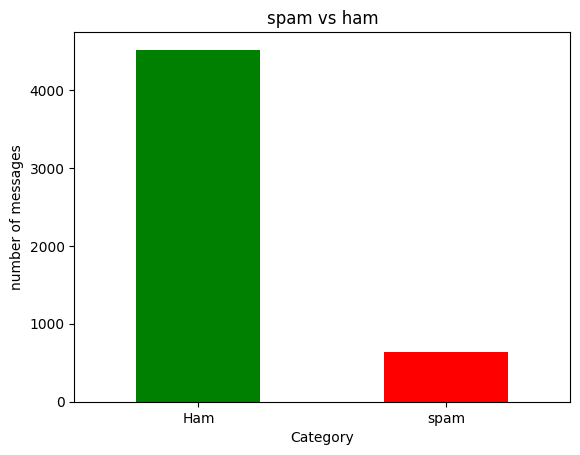

In [36]:
import matplotlib.pyplot as plt
data["Category"].value_counts().plot(kind="bar",color=["green","red"])
plt.xticks([0,1],["Ham","spam"],rotation=0)
plt.title("spam vs ham")
plt.ylabel("number of messages")
plt.show()

In [37]:
data["Message"].apply(len)

0       102
1        23
2       121
3        43
4        59
       ... 
5567    126
5568     33
5569     49
5570    124
5571     25
Name: Message, Length: 5157, dtype: int64

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [39]:
tfidf=TfidfVectorizer(max_features=5572)
x=tfidf.fit_transform(data["Message"]).toarray()
y=data["Category"]

In [40]:
data.head(10)

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final ...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
5,spam,freemsg hey there darling its been weeks now a...
6,ham,even my brother is not like to speak with me t...
7,ham,as per your request melle melle oru minnaminun...
8,spam,winner as a valued network customer you have b...
9,spam,had your mobile months or more u r entitled to...


In [41]:
data["Message"].unique()

array(['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
       'ok lar joking wif u oni',
       'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs',
       ..., 'pity was in mood for that soany other suggestions',
       'the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free',
       'rofl its true to its name'], shape=(5089,), dtype=object)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
smote=SMOTE(random_state=42)
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)

In [44]:
import numpy as np
unique,counts=np.unique(y_train_resampled,return_counts=True)
dict(zip(unique,counts))

{'ham': np.int64(3620), 'spam': np.int64(3620)}

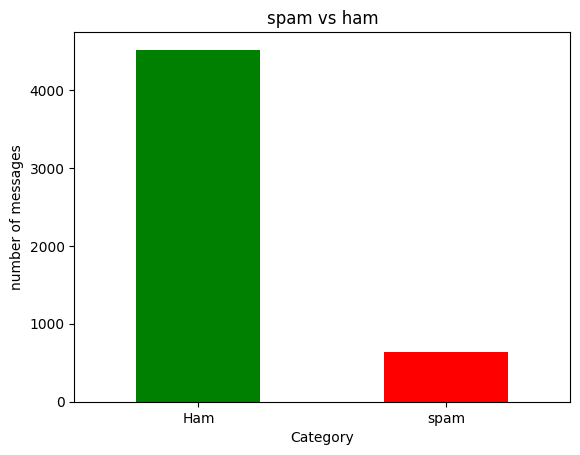

In [45]:
import matplotlib.pyplot as plt
data["Category"].value_counts().plot(kind="bar",color=["green","red"])
plt.xticks([0,1],["Ham","spam"],rotation=0)
plt.title("spam vs ham")
plt.ylabel("number of messages")
plt.show()

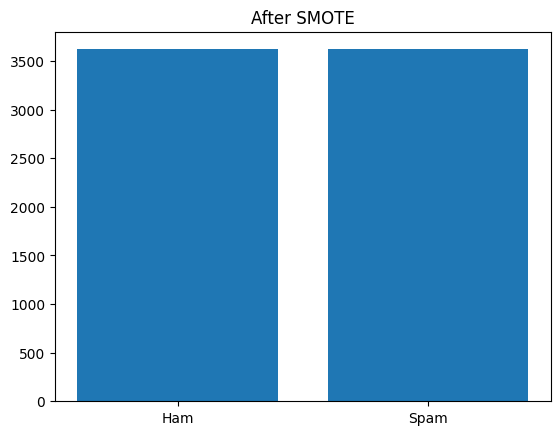

In [47]:
unique, counts = np.unique(y_train_resampled, return_counts=True)
plt.bar(unique, counts, tick_label=['Ham', 'Spam'])
plt.title("After SMOTE")
plt.show()

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
tfidf=TfidfVectorizer(max_features=5572)
x=tfidf.fit_transform(data["Message"]).toarray()
y=data["Category"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
smote=SMOTE(random_state=42)
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)
from sklearn.naive_bayes import MultinomialNB
data["Category"] = data["Category"].map({"ham": 0, "spam": 1})
model=MultinomialNB()
model.fit(x_train_resampled,y_train_resampled)


MultinomialNB()

In [47]:
data["Category"] = data["Category"].map({"ham": 0, "spam": 1})

In [48]:
print(data["Category"].unique())

[nan]


In [49]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9680232558139535
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.97      0.98       896
        spam       0.82      0.96      0.89       136

    accuracy                           0.97      1032
   macro avg       0.91      0.97      0.93      1032
weighted avg       0.97      0.97      0.97      1032

Confusion Matrix:
 [[868  28]
 [  5 131]]


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": MultinomialNB(),
}

for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


--- Logistic Regression ---
Confusion Matrix:
[[894   2]
 [ 33 103]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       896
        spam       0.98      0.76      0.85       136

    accuracy                           0.97      1032
   macro avg       0.97      0.88      0.92      1032
weighted avg       0.97      0.97      0.96      1032


--- KNN ---
Confusion Matrix:
[[896   0]
 [ 74  62]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       896
        spam       1.00      0.46      0.63       136

    accuracy                           0.93      1032
   macro avg       0.96      0.73      0.79      1032
weighted avg       0.93      0.93      0.92      1032


--- Decision Tree ---
Confusion Matrix:
[[874  22]
 [ 19 117]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.

In [54]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[894   2]
 [ 33 103]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       896
        spam       0.98      0.76      0.85       136

    accuracy                           0.97      1032
   macro avg       0.97      0.88      0.92      1032
weighted avg       0.97      0.97      0.96      1032



In [55]:
import pickle
with open("naive_bayes_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(tfidf, vec_file)

In [56]:
# 📌 Step 11: Load and Predict on New Sample
with open("naive_bayes_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

with open("tfidf_vectorizer.pkl", "rb") as vec_file:
    loaded_vectorizer = pickle.load(vec_file)

sample=["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

sample_vector = loaded_vectorizer.transform(sample).toarray()
prediction = loaded_model.predict(sample_vector)

print("Spam" if prediction[0] == 1 else "Not Spam")

Not Spam


In [57]:
from sklearn.svm import SVC
import pickle

# Train the model
model = SVC()
model.fit(x_train, y_train)

# Save the model
with open('svm_spam_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [58]:
# Load it back
with open('svm_spam_model.pkl', 'rb') as file:
    model = pickle.load(file)
sample=["FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"]
sample_vector = loaded_vectorizer.transform(sample).toarray()
prediction = model.predict(sample_vector)

print(prediction[0])
# Predict
y_pred = model.predict(x_test)

spam


In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
with open("random_forest.model.pkl","wb") as file:
    pickle.dump(model,file)
with open("random_forest.model.pkl","rb") as file:
    model=pickle.load(file)
sample=["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
sample_vector = loaded_vectorizer.transform(sample).toarray()
prediction = model.predict(sample_vector)
print("Spam" if prediction[0] == 1 else "Not Spam")
# Predict
y_pred = model.predict(x_test)

Not Spam


In [61]:
import sklearn
print(sklearn.__version__)

1.6.1
